In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_excel('c:/users/home/documents/project_3/static/data/[Casey] ERP.xls', header=2)
df.columns

Index(['Year (ending June 30)', 'Number', 'Change in number',
       'Change in percent', 'Greater Melbourne change in percent'],
      dtype='object')

In [3]:
df = df[0:14]

In [4]:
df.head(14)

,Year (ending June 30),Number,Change in number,Change in percent,Greater Melbourne change in percent
0,2006,220440.0,NaN,NaN,NaN
1,2007,228496.0,8056.0,3.6545,2.1538
2,2008,237529.0,9033.0,3.9532,2.3343
3,2009,246678.0,9149.0,3.8517,2.5525
4,2010,254471.0,7793.0,3.1592,1.8372
5,2011,261282.0,6811.0,2.6765,1.5468
6,2012,269240.0,7958.0,3.0458,2.3857
7,2013,278023.0,8783.0,3.2621,2.4851
8,2014,287937.0,9914.0,3.5659,2.5192
9,2015,299528.0,11591.0,4.0255,2.5419


In [5]:
df.columns

Index(['Year (ending June 30)', 'Number', 'Change in number',
       'Change in percent', 'Greater Melbourne change in percent'],
      dtype='object')

In [6]:
df.drop(columns = ['Change in number',
       'Change in percent', 'Greater Melbourne change in percent'], axis=1, inplace=True)

In [7]:
df = df.rename(columns={'Year (ending June 30)': 'Year'})

In [8]:
df.Year.astype(int)

0     2006
1     2007
2     2008
3     2009
4     2010
5     2011
6     2012
7     2013
8     2014
9     2015
10    2016
11    2017
12    2018
13    2019
Name: Year, dtype: int32

In [39]:
X = df['Year'].astype(int).values.reshape(-1, 1)
X

array([[2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [10]:
type(X)

numpy.ndarray

In [40]:
y = df.Number.values.reshape(-1, 1);
y

array([[220440.],
       [228496.],
       [237529.],
       [246678.],
       [254471.],
       [261282.],
       [269240.],
       [278023.],
       [287937.],
       [299528.],
       [312789.],
       [326771.],
       [340443.],
       [353872.]])

In [12]:
type(y)

numpy.ndarray

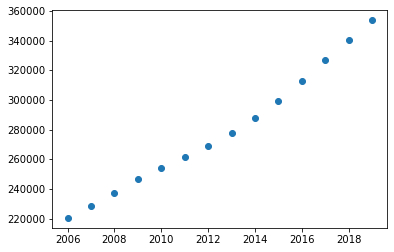

In [13]:
plt.scatter(X, y)


In [14]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression
import joblib

# YOUR CODE HERE
model = LinearRegression()
model

LinearRegression()

In [15]:
model.fit(X, y)

LinearRegression()

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 


Weight coefficients:  [[9991.25494505]]
y-axis intercept:  [-19827579.21978021]


In [17]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2006]]
Max X Value: [[2019]]


In [18]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[214878.2]]
Max y Value: [[344764.51428572]]


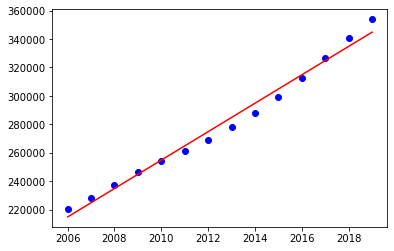

In [19]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X_test

array([[2015],
       [2017],
       [2006],
       [2018]])

In [22]:
y_test

array([[299528.],
       [326771.],
       [220440.],
       [340443.]])

In [25]:
X_ob = np.array(2018)
X_ob = X_ob.reshape(-1, 1)
X_ob

array([[2018]])

In [26]:
y_ob = model.predict(X_ob)
y_ob

array([[334773.25934066]])

In [29]:
# saving the trained model
# import joblib
# joblib.dump(model, 'popu_linear_model.pkl')

['popu_linear_model.pkl']

In [30]:
# loading the pre-build model

regression = joblib.load('popu_linear_model.pkl')

In [31]:
y_ob = regression.predict(X_ob)
y_ob

array([[334773.25934066]])

In [32]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

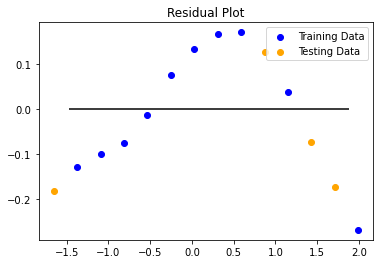

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.021480561532143276, R2: 0.9872744319247784


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [43]:
y = df.Number.values
y

array([220440., 228496., 237529., 246678., 254471., 261282., 269240.,
       278023., 287937., 299528., 312789., 326771., 340443., 353872.])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
y_test

array([299528., 326771., 220440., 340443.])

In [46]:
rd_model = randomforest.fit(X_train, y_train)

In [52]:
X_ob = np.array(2015)
X_ob = X_ob.reshape(-1, 1)
X_ob

array([[2015]])

In [53]:
rd_model.predict(X_ob)

array([291842.63])

In [50]:
X_test

array([[2015],
       [2017],
       [2006],
       [2018]])

In [51]:
y_test

array([299528., 326771., 220440., 340443.])

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/home/Documents/Monu-Hw [KD]/project_3/static/data/Vic_Subs_Popu_2001_2019.csv')

In [6]:
df.shape

(859, 20)

In [10]:
df.head(3)

,Suburb,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Abbotsford,4150,4339,4444,4452,4498,4537,4638,4727,4833,5029,5213,5544,6539,7411,8078,8770,9453,9855,10088
1,Aberfoyle Park,12307,12377,12433,12385,12415,12454,12414,12356,12251,12207,12146,12126,12063,12035,11960,11863,11835,11784,11723
2,Airport West,6997,6970,6952,6904,6870,6878,6920,6983,7067,7175,7234,7301,7390,7521,7694,7903,8032,8280,8559


In [7]:
import numpy as np


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

In [8]:
import statsmodels.api as sm

In [9]:
import numpy as np

In [24]:
X = df.iloc[0,1:18].values
X

array([4150, 4339, 4444, 4452, 4498, 4537, 4638, 4727, 4833, 5029, 5213,
       5544, 6539, 7411, 8078, 8770, 9453], dtype=object)

In [27]:
X = X.reshape(1, -1)
X

array([[4150, 4339, 4444, 4452, 4498, 4537, 4638, 4727, 4833, 5029, 5213,
        5544, 6539, 7411, 8078, 8770, 9453]], dtype=object)

In [28]:
y = df.iloc[0,18].reshape(-1,1)
y

array([[9855]], dtype=int64)

In [30]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [31]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
target = pd.DataFrame(data.target, columns=["MEDV"])

In [34]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [35]:
import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   3.74e-256
Time:                        18:31:54   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""